In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

In [7]:
DATA_DIR = "dataset"  
IMG_SIZE = 128            
BATCH_SIZE = 32           
EPOCHS = 20
print("1. Loading Data...")

1. Loading Data...


In [8]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    DATA_DIR,
    validation_split=0.1,     # Use 20% of data for checking accuracy
    subset="training",
    seed=123,
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    DATA_DIR,
    validation_split=0.1,
    subset="validation",
    seed=123,
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE
)

Found 6108 files belonging to 3 classes.
Using 5498 files for training.
Found 6108 files belonging to 3 classes.
Using 610 files for validation.


In [9]:
class_names = train_ds.class_names
print(f"Classes found: {class_names}")

Classes found: ['left', 'nothing', 'up']


In [10]:
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [11]:
print("2. Building the CNN...")

2. Building the CNN...


In [12]:
model = models.Sequential([
    # Standardize data (rescale 0-255 to 0-1)
    layers.Rescaling(1./255, input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    
    # Layer 1: Look for simple features (edges, lines)
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    
    # Layer 2: Look for shapes (circles, squares)
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    
    # Layer 3: Look for complex features (fingers, hands)
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    
    # Flatten: Turn the 2D image data into a 1D list of numbers
    layers.Flatten(),
    
    # Dense: Think about what the features mean
    layers.Dense(128, activation='relu'),
    
    # Output Layer: Decide which class it is
    layers.Dense(len(class_names)) 
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.summary()



c:\Python313\Lib\site-packages\keras\src\layers\preprocessing\data_layer.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 128, 128, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 64, 64, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     2,097,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,121,251 (8.09 MB)

 Trainable params: 2,121,251 (8.09 MB)

 Non-trainable params: 0 (0.00 B)

3. Training...
Epoch 1/20
172/172 ━━━━━━━━━━━━━━━━━━━━ 22s 102ms/step - accuracy: 0.9445 - loss: 0.1566 - val_accuracy: 1.0000 - val_loss: 6.8951e-05
Epoch 2/20
172/172 ━━━━━━━━━━━━━━━━━━━━ 16s 95ms/step - accuracy: 1.0000 - loss: 5.5573e-05 - val_accuracy: 1.0000 - val_loss: 1.9492e-05
Epoch 3/20
172/172 ━━━━━━━━━━━━━━━━━━━━ 17s 99ms/step - accuracy: 1.0000 - loss: 1.5897e-05 - val_accuracy: 1.0000 - val_loss: 7.7247e-06
Epoch 4/20
172/172 ━━━━━━━━━━━━━━━━━━━━ 16s 95ms/step - accuracy: 1.0000 - loss: 5.9334e-06 - val_accuracy: 1.0000 - val_loss: 3.6021e-06
Epoch 5/20
172/172 ━━━━━━━━━━━━━━━━━━━━ 17s 100ms/step - accuracy: 1.0000 - loss: 2.8565e-06 - val_accuracy: 1.0000 - val_loss: 1.9890e-06
Epoch 6/20
172/172 ━━━━━━━━━━━━━━━━━━━━ 19s 108ms/step - accuracy: 1.0000 - loss: 1.5996e-06 - val_accuracy: 1.0000 - val_loss: 1.2331e-06
Epoch 7/20
172/172 ━━━━━━━━━━━━━━━━━━━━ 18s 103ms/step - accuracy: 1.0000 - loss: 1.0192e-06 - val_accuracy: 1.0000 - val_loss: 8.5009e-07
Epoch 8/20
172/172 

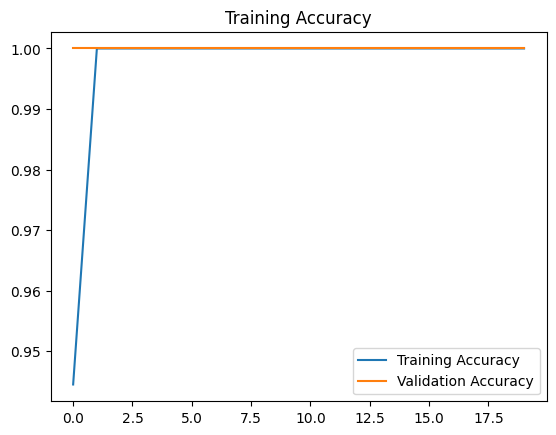

In [ ]:
# print("3. Training...")
# history = model.fit(
#     train_ds,
#     validation_data=val_ds,
#     epochs=EPOCHS
# )

# print("4. Saving the model...")
# model.save('gesture_model.keras')
# print("Model saved as 'gesture_model.keras'!")

# # Optional: Plot training accuracy
# acc = history.history['accuracy']
# val_acc = history.history['val_accuracy']
# plt.plot(acc, label='Training Accuracy')
# plt.plot(val_acc, label='Validation Accuracy')
# plt.legend(loc='lower right')
# plt.title('Training Accuracy')
# plt.show()

In [ ]:
import numpy as np
import cv2 as cv

# --- CONFIGURATION ---
MODEL_PATH = 'gesture_model.keras'
CLASS_NAMES = ['left','nothing', 'up']  # MUST match your folder names alphabetically!
IMG_SIZE = 128                   # Must match the training script size
ROI_SIZE = 300                   # Size of the cropping box
# ---------------------

print("Loading model...")
model = tf.keras.models.load_model(MODEL_PATH)
print("Model loaded!")

cap = cv.VideoCapture(0)

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # 1. Flip and Define ROI (Same logic as data collection)
    frame = cv.flip(frame, 1)
    h, w, _ = frame.shape
    x1, y1 = w - ROI_SIZE - 20, 20
    x2, y2 = x1 + ROI_SIZE, y1 + ROI_SIZE

    # 2. Extract the ROI
    roi_image = frame[y1:y2, x1:x2]
    
    # 3. Preprocessing for the Model
    # Resize to 128x128 (what the model expects)
    img_resized = cv.resize(roi_image, (IMG_SIZE, IMG_SIZE))
    
    # Convert to array
    img_array = tf.keras.utils.img_to_array(img_resized)
    
    # Expand dimensions: Model expects a BATCH of images
    # Shape changes from (128, 128, 3) -> (1, 128, 128, 3)
    img_array = tf.expand_dims(img_array, 0)

    # 4. Prediction
    predictions = model.predict(img_array, verbose=0)
    score = tf.nn.softmax(predictions[0]) # Convert raw output to probability

    # Get the class with highest probability
    predicted_class = CLASS_NAMES[np.argmax(score)]
    confidence = 100 * np.max(score)

    # 5. Visual Feedback
    # Draw the box
    color = (0, 255, 0) if confidence > 80 else (0, 0, 255) # Green if sure, Red if unsure
    cv.rectangle(frame, (x1, y1), (x2, y2), color, 2)
    
    # Write the prediction text
    label = f"{predicted_class}: {confidence:.2f}%"
    cv.putText(frame, label, (x1, y1 - 10), 
                cv.FONT_HERSHEY_SIMPLEX, 0.8, color, 2)

    cv.imshow("Live Prediction", frame)
    
    # Show the "Model's View" to debug (optional)
    cv.imshow("What Model Sees", roi_image)

    if cv.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv.destroyAllWindows()

Loading model...
Model loaded!
